In [41]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def distance(p1, p2):  # p1 et p2 sont des triplets de la forme [h,s,v]
    r1 = (p1[1] / 255) * (p1[2] / 255)
    theta1 = (p1[0] / 180) * 2 * np.pi
    z1 = p1[2] / 255 - 1
    x1 = r1 * np.cos(theta1)
    y1 = r1 * np.sin(theta1)
    r2 = (p2[1] / 255) * (p2[2] / 255)
    theta2 = (p2[0] / 180) * 2 * np.pi
    z2 = p2[2] / 255 - 1
    x2 = r2 * np.cos(theta2)
    y2 = r2 * np.sin(theta2)

    hsv_color1 = np.uint8([[[p1[0], p1[1], p1[2]]]])
    hsv_color2 = np.uint8([[[p2[0], p2[1], p2[2]]]])
    bgr_color1 = cv2.cvtColor(hsv_color1, cv2.COLOR_HSV2BGR)
    rgb_color1 = cv2.cvtColor(bgr_color1, cv2.COLOR_BGR2RGB)
    bgr_color2 = cv2.cvtColor(hsv_color2, cv2.COLOR_HSV2BGR)
    rgb_color2 = cv2.cvtColor(bgr_color2, cv2.COLOR_BGR2RGB)
    plt.figure(1)
    plt.imshow([[rgb_color1[0][0],rgb_color2[0][0]]])
    plt.show()

    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2 + (z1 - z2) ** 2)

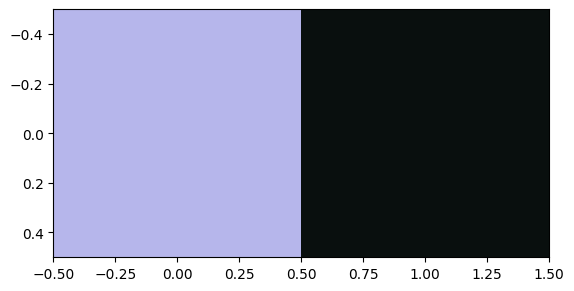

0.8849609486537798


In [42]:
print(distance([120, 57, 235], [87, 110, 15]))

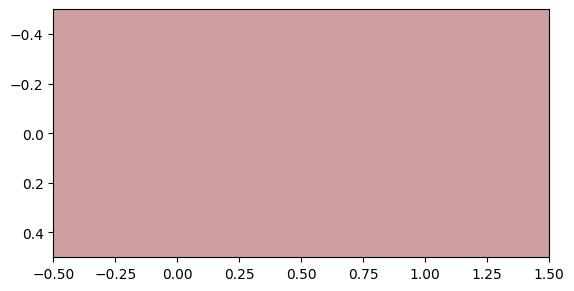

0.006272398899489643


In [43]:
print(distance([179, 57, 205], [0, 57, 205]))

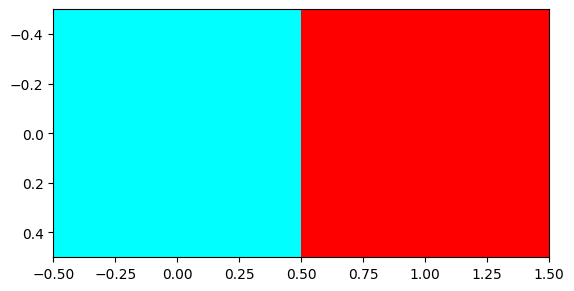

2.0


In [44]:
print(distance([90, 255, 255], [0, 255, 255]))